In [2]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from io import BytesIO

import requests

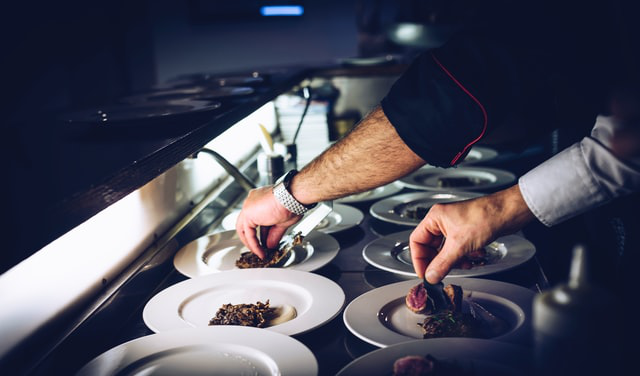

In [3]:
url = 'https://unsplash.com/photos/boaDpmC-_Xo/download?ixid=MnwxMjA3fDB8MXxhbGx8MXx8fHx8fDJ8fDE2MzQ2ODI0MzQ&force=true&w=640'
response = requests.get(url)

image = Image.open(BytesIO(response.content)).convert()
image

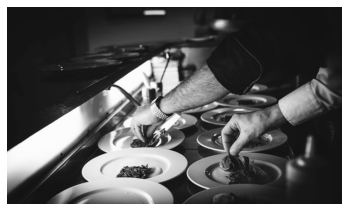

In [4]:
img_arr = np.copy(image)
# img_arr.shape
img_gray_average = np.mean(img_arr, axis=2)

# img_gray_average

plt.imshow(img_gray_average, cmap='gray')
plt.axis('off')
plt.show()



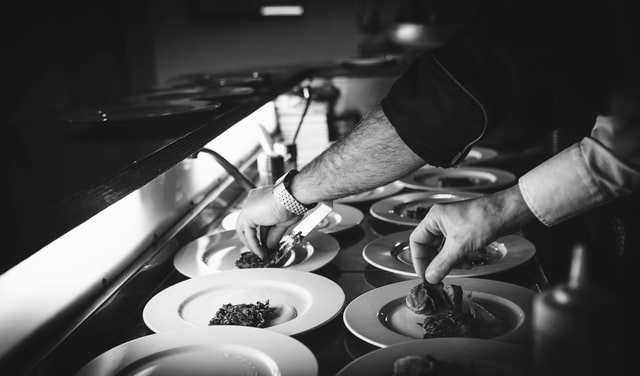

In [5]:
new_img_gray_average = np.empty(shape=img_arr.shape, dtype=np.uint8)
new_img_gray_average[:,:,0] = img_gray_average
new_img_gray_average[:,:,1] = img_gray_average
new_img_gray_average[:,:,2] = img_gray_average

new_img_gray_average

img_res = Image.fromarray(new_img_gray_average)
img_res

In [75]:
#img_gray_average.shape
#img_arr.shape
y.shape

(376, 640)

## Aplicação do _luminance perception_

$ Y_{linear} = 0.2126R_{linear} + 0.7152G_{linear} + 0.0722B_{linear}$

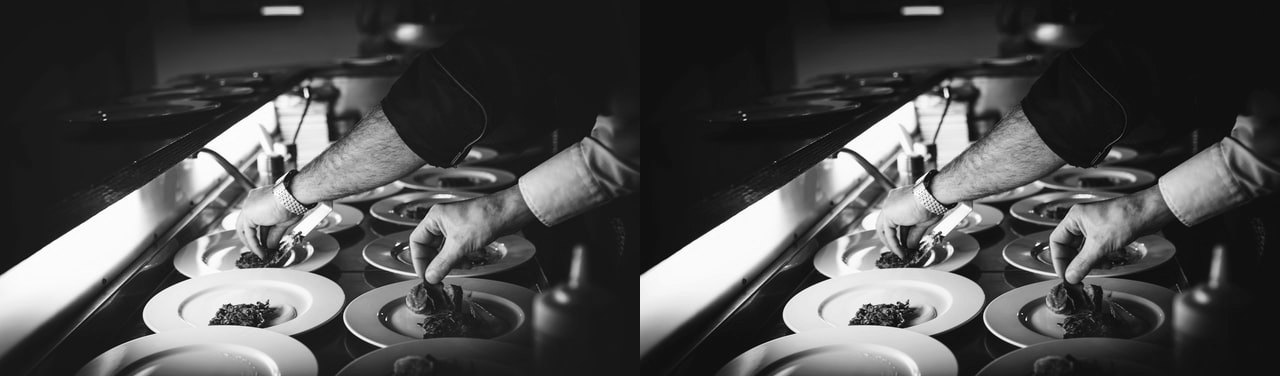

In [77]:
pesos = [0.2126, 0.7152, 0.0722]

res = np.array(img_arr * pesos, dtype=np.uint8)
y = np.array(np.sum(res, axis=2), dtype=np.uint8)

concat = np.array(np.concatenate((img_gray_average,y), axis=1), dtype=np.uint8)
img_ones = Image.fromarray(concat)
img_ones

In [8]:
print(res[0,0,:])
print(img_arr[0,0,:])

[ 2 12  2]
[12 17 39]


In [74]:
y.shape


(376, 640)

In [10]:
np.sum(res, axis=2).shape

(376, 640)

In [11]:
full = 1408 * 2400 * 3
original = 2750 *  4687 * 3

print(f"full: {full}, original: {original} {original/full}")

full: 10137600, original: 38667750 3.8142903645833335


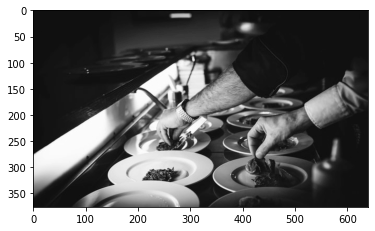

In [12]:
new_array_test = np.sum(res, axis=2)
type(new_array_test)

plt.imshow(new_array_test, cmap='gray')
plt.show()

## Aplicação do _gamma compression_

\begin{align} 
          C_{linear} = \{
          \begin{array}{cl}
          \frac{C_{srgb}}{12.92}, C_{srgb}≤{0.04045}\\
          (\frac{C_{srgb}+0.055}{1.055})^{2.4}, C_{srgb}>{0.04045}
          \end{array} 
\end{align}

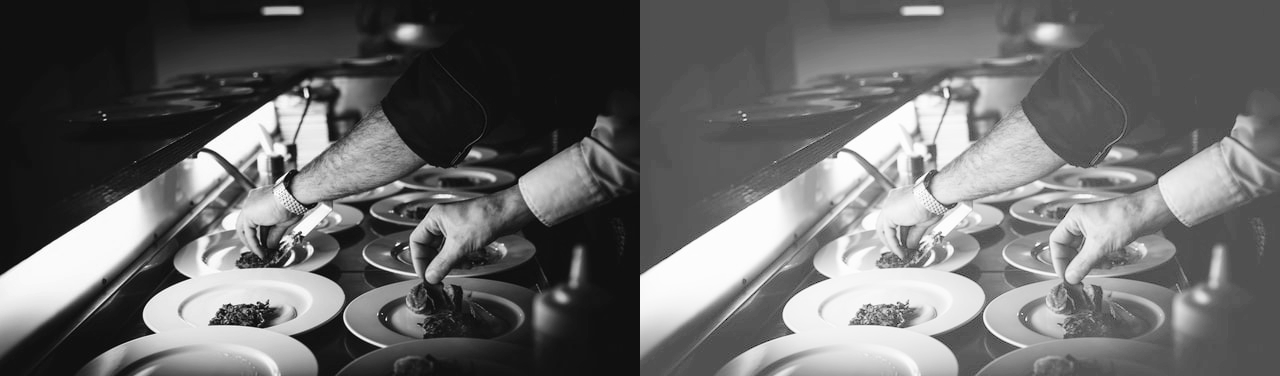

In [61]:
img_1 = 255.0 * (y / 255.0)**(1 / 2.4)

img_gamma = np.array(np.concatenate((y, img_1), axis=1), dtype=np.uint8)

img_ones = Image.fromarray(img_gamma)
img_ones

## Aplicação do _linear approximation_

$ Y' = 0.299R' + 0.587G' + 0.114B'$

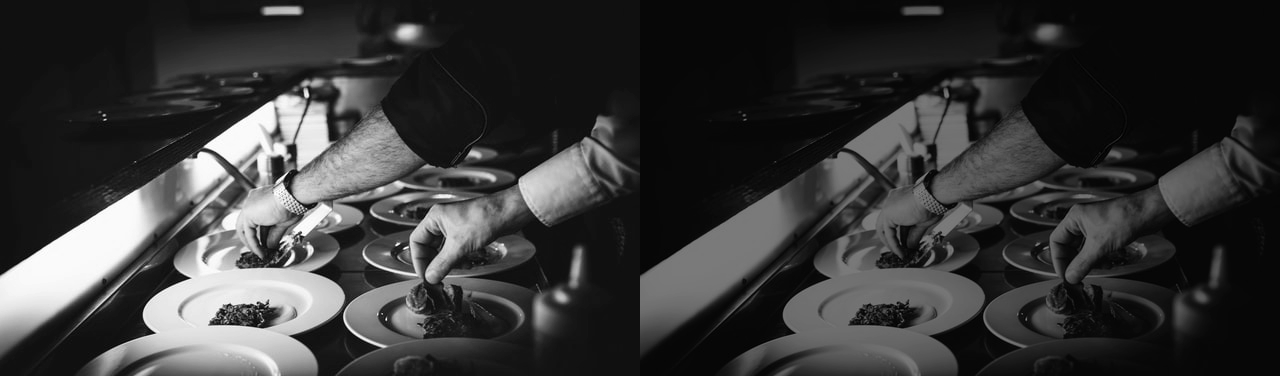

In [78]:
pesos2 = [0.299, 0.587, 0.114]

a = np.array(res * pesos2, dtype=np.uint8)
z = np.array(np.sum(a, axis=2), dtype=np.uint8)

concat = np.array(np.concatenate((y,z), axis=1), dtype=np.uint8)

img_ones = Image.fromarray(concat)
img_ones